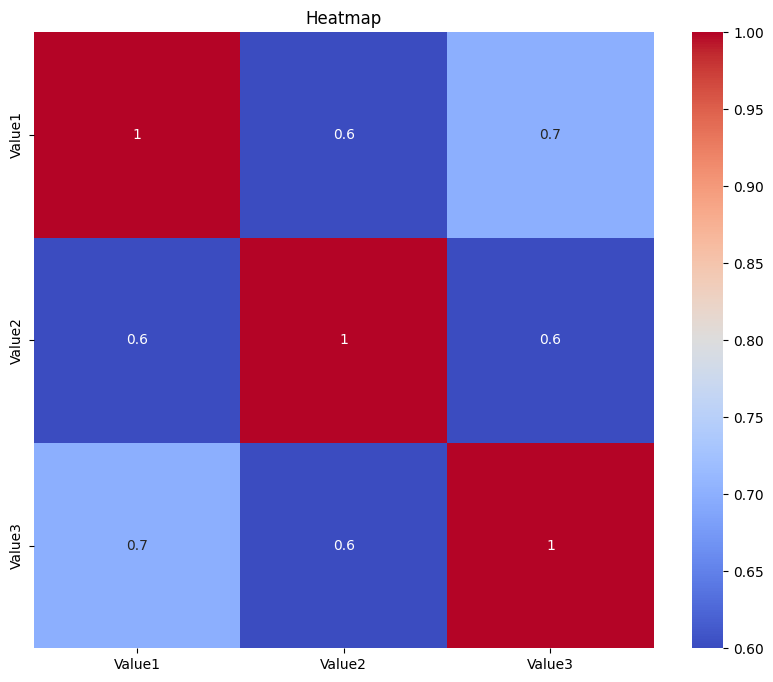

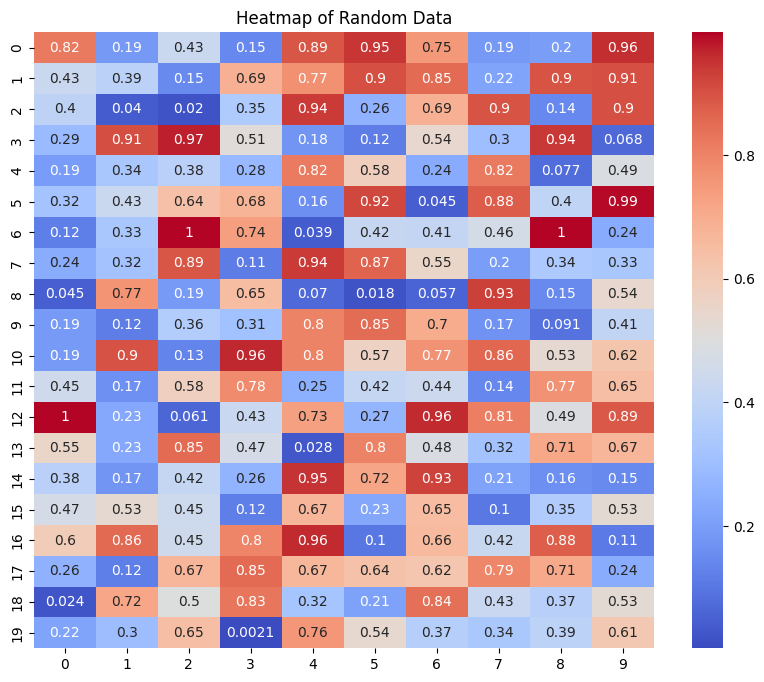

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import folium
from plotly.subplots import make_subplots

# 샘플 데이터 생성
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Value1': [10, 20, 30, 40, 50],
    'Value2': [20, 30, 10, 50, 40],
    'Value3': [30, 10, 20, 40, 50],
    'Latitude': [37.55, 36.33, 35.14, 34.20, 33.38],
    'Longitude': [126.97, 127.38, 126.71, 126.54, 126.96]
})

## 히트맵
plt.figure(figsize=(10, 8))
numeric_df = df[['Value1', 'Value2', 'Value3']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

plt.figure(figsize=(10, 8))
random_data = np.random.rand(20, 10)
sns.heatmap(random_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Random Data')
plt.show()


# 샘플 데이터 생성
data_treemap = {
    'Category': ['Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch'],
    'Item': ['waffles', 'eggs', 'pancakes', 'tea', 'coffee', 'salad', 'sandwich', 'soup', 'pie', 'iced tea', 'coffee'],
    'Value': [50, 60, 30, 40, 20, 100, 90, 80, 70, 50, 40]
}

df_treemap = pd.DataFrame(data_treemap)

# 트리맵 생성
fig_treemap = px.treemap(df_treemap, path=['Category', 'Item'], values='Value', color='Category',
                         color_discrete_sequence=px.colors.qualitative.Pastel,
                         title='Daily Food Sales')
fig_treemap.show()

## 버블차트
fig = px.scatter(df, x='Value1', y='Value2', size='Value3', color='Category', title='Bubble Chart')
fig.show()

## 레이더 차트
categories = df.columns[1:4]
fig = go.Figure()
for i in range(len(df)):
    fig.add_trace(go.Scatterpolar(
        r=df.iloc[i, 1:4].values,
        theta=categories,
        fill='toself',
        name=df['Category'][i]
    ))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 60]
        )),
    showlegend=True,
    title='Radar Chart'
)
fig.show()


## 생키 다이어그램
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["A", "B", "C", "D", "E", "Output1", "Output2", "Output3"],
        color=["blue", "green", "red", "purple", "orange", "blue", "green", "red"]
    ),
    link=dict(
        source=[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
        target=[5, 6, 7, 5, 6, 7, 5, 6, 7, 5],
        value=[10, 20, 30, 40, 50, 20, 30, 10, 50, 40]
    )
))
fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()

In [2]:
# 샘플 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2018-01-01', end='2023-12-31', freq='M')
data = {
    'Date': dates,
    'Value': np.random.randint(100, 500, size=len(dates))
}
df = pd.DataFrame(data)

# 월별 데이터를 연도별로 그룹화
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
yearly_data = df.groupby(['Year', 'Month'])['Value'].sum().reset_index()

# Plotly를 사용한 인터랙티브 막대 그래프
fig = go.Figure()

# 각 연도에 대한 데이터 추가
years = yearly_data['Year'].unique()
for year in years:
    yearly_data_filtered = yearly_data[yearly_data['Year'] == year]
    fig.add_trace(go.Bar(
        x=yearly_data_filtered['Month'],
        y=yearly_data_filtered['Value'],
        name=str(year),
        visible=(year == years[0])  # 첫 번째 연도만 초기 표시
    ))

# 슬라이더 생성
steps = []
for i, year in enumerate(years):
    step = dict(
        method='update',
        args=[{'visible': [i == j for j in range(len(years))]},
              {'title': f'Monthly Data for Year {year}'}],
        label=str(year)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title='Monthly Data by Year',
    xaxis_title='Month',
    yaxis_title='Value',
    barmode='group'
)

fig.show()


/var/folders/5w/ptnqk03j72x_7v4gsrv2_g9w0000gn/T/ipykernel_38571/145325580.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



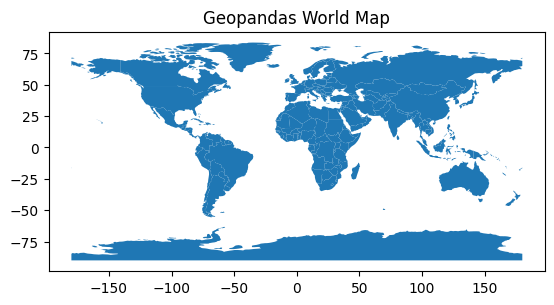

In [3]:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context
# 지리 데이터 생성
geo_data = {
    'Location': ['Seoul', 'Busan', 'Incheon', 'Daegu', 'Daejeon'],
    'Latitude': [37.5665, 35.1796, 37.4563, 35.8714, 36.3510],
    'Longitude': [126.9780, 129.0756, 126.7052, 128.6014, 127.3850]
}
geo_df = pd.DataFrame(geo_data)

## geopandas를 사용한 지리 정보 시각화
# 직접 다운로드한 데이터셋 사용
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
world = gpd.read_file(url)

world.plot()
plt.title('Geopandas World Map')
plt.show()

In [4]:
# 샘플 데이터 생성
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Value1': [10, 20, 30, 40, 50],
    'Value2': [20, 30, 10, 50, 40],
    'Value3': [30, 10, 20, 40, 50],
    'Latitude': [37.55, 36.33, 35.14, 34.20, 33.38],
    'Longitude': [126.97, 127.38, 126.71, 126.54, 126.96]
})

# 서브플롯 생성
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("Heatmap", "Random Data Heatmap", "Treemap", "Bubble Chart", "Radar Chart", "Sankey Diagram"),
    specs=[[{"type": "heatmap"}, {"type": "heatmap"}],
           [{"type": "treemap"}, {"type": "scatter"}],
           [{"type": "polar"}, {"type": "sankey"}]]
)

# 1. 히트맵
numeric_df = df[['Value1', 'Value2', 'Value3']]
heatmap = go.Heatmap(
    z=numeric_df.corr().values,
    x=numeric_df.columns,
    y=numeric_df.columns,
    colorscale='Viridis',  # 올바른 색상표 사용
    showscale=True
)
fig.add_trace(heatmap, row=1, col=1)

# 2. 랜덤 데이터 히트맵
random_data = np.random.rand(20, 10)
random_heatmap = go.Heatmap(
    z=random_data,
    colorscale='Viridis',  # 올바른 색상표 사용
    showscale=True
)
fig.add_trace(random_heatmap, row=1, col=2)

# 3. 트리맵
data_treemap = {
    'Category': ['Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch'],
    'Item': ['waffles', 'eggs', 'pancakes', 'tea', 'coffee', 'salad', 'sandwich', 'soup', 'pie', 'iced tea', 'coffee'],
    'Value': [50, 60, 30, 40, 20, 100, 90, 80, 70, 50, 40]
}
df_treemap = pd.DataFrame(data_treemap)
treemap = px.treemap(df_treemap, path=['Category', 'Item'], values='Value', color='Category',
                     color_discrete_sequence=px.colors.qualitative.Pastel)
for trace in treemap.data:
    fig.add_trace(trace, row=2, col=1)

# 4. 버블차트
bubble_chart = px.scatter(df, x='Value1', y='Value2', size='Value3', color='Category', title='Bubble Chart')
for trace in bubble_chart.data:
    fig.add_trace(trace, row=2, col=2)

# 5. 레이더 차트
categories = df.columns[1:4]
radar_chart = go.Figure()
for i in range(len(df)):
    radar_chart.add_trace(go.Scatterpolar(
        r=df.iloc[i, 1:4].values,
        theta=categories,
        fill='toself',
        name=df['Category'][i]
    ))
for trace in radar_chart.data:
    fig.add_trace(trace, row=3, col=1)

# 6. 생키 다이어그램
sankey = go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["A", "B", "C", "D", "E", "Output1", "Output2", "Output3"],
        color=["blue", "green", "red", "purple", "orange", "blue", "green", "red"]
    ),
    link=dict(
        source=[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
        target=[5, 6, 7, 5, 6, 7, 5, 6, 7, 5],
        value=[10, 20, 30, 40, 50, 20, 30, 10, 50, 40]
    )
)
fig.add_trace(sankey, row=3, col=2)

# 레이아웃 업데이트
fig.update_layout(height=800, showlegend=False, title_text="Multiple Plots in One Figure")

# 차트 보여주기
fig.show()
